# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.groupby('gender').count().reset_index()

,gender,temperature,heart_rate
0,F,65,65
1,M,65,65


In [4]:
sample_mean=df.temperature.mean()
sample_mean

98.24923076923078

In [5]:
sample_sigma=df.temperature.std(ddof=1)
sample_sigma

0.7331831580389454

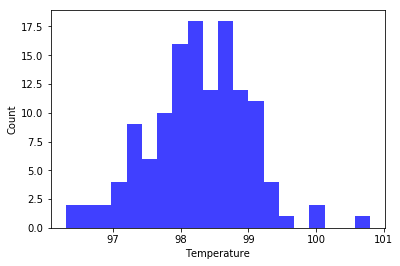

In [6]:
plt.hist(df.temperature, bins=20, facecolor='blue', alpha=0.75)
plt.ylabel("Count")
plt.xlabel("Temperature")
plt.show()

# 1. ** Is the distribution of body temperatures normal? **
From the histogram above the distribution appears to be normal. We have no missing data and 130 entries with a mean of 98.24∘F. Since we have more than 30 observations we can use a ztest to test whether the distribution is normal.

In [7]:
z,pval=stats.normaltest(df.temperature)
print(pval)
if pval<0.05:
    print("The distribution is not normally distributed.")

0.258747986349


** Since the p-value is rather large we conclude the distribution is normal.**

# 2. a) Is the sample size large? 
The sample size is only 130 observations which is of medium size.

# 2. b) Are the observations independent? 
Yes, since each observation represents a different person and the heart rate and body temperature of one person should have no influence on another person in the smaple.

# 3. a) Is the true population mean really 98.6 degrees F?
## Null hypothesis: The true mean is 98.6

In [8]:
one_sample = stats.ttest_1samp(df.temperature, 98.6)
print ("The t-statistic is %.3f and the p-value is %.5f." % one_sample)

The t-statistic is -5.455 and the p-value is 0.00000.


** With a p-value less than 0.05 we reject the null hypothesis that the true mean is 98.6∘F. **

# 3. b) Would you use a one-sample or two-sample test? Why?
 We use a one-sample test because we are comparing the sample mean with the known population mean. We are not separating our data into different groups.
# 3. c) In this situation, is it appropriate to use the tt or zz statistic?
 Since the sample size is larger than 30 we can assume the sample standard deviation is a good approximation of the population standard deviation and we can use the z statistic.


In [9]:
# 3. d) Now try using the other test. How is the result be different? Why? 
two_sample = stats.ttest_ind(df.temperature, df.heart_rate, equal_var=False)
print ("The t-statistic is %.3f and the p-value is %.5f." % two_sample)

The t-statistic is 39.324 and the p-value is 0.00000.


# 4. At what temperature should we consider someone's temperature to be "abnormal"?
We consider a temperature to be normal if it is within 2 standard deviations of the mean so we use a 95% confidence interval. Note that here a temperature being abnormal does not necesarily imply illness.
#    Start by computing the margin of error and confidence interval. 

In [10]:
conf_low,conf_high =stats.norm.interval(0.95, loc=sample_mean, scale=sample_sigma)
margin_of_error = conf_high-sample_mean
print(margin_of_error)
print((conf_low,conf_high))

1.43701258383
(96.812218185403111, 99.686243353058444)


** The margin of error is 1.437 so from our 95% confidence interval we find that temperatures less than 96.81∘F or greater than 99.68∘F could be interpreted as "abnormal". **

# 5. Is there a significant difference between males and females in normal temperature?

## Null hypothesis: female_normal_temperature=male_normal_temperature

In [11]:
male_temp=df[df.gender=="M"].temperature
female_temp=df[df.gender=="F"].temperature
print(male_temp.mean())
print(female_temp.mean())
stats.ttest_ind(male_temp,female_temp,equal_var=False)

98.1046153846154
98.39384615384613


Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

** From our observations we find a sample mean of 98.10∘F for males and a sample mean of 98.39∘F for females. We obtain a p-value < 0.05 so we reject the null hypothesis and find a statistical significant difference between male and female normal temperatures. **
##    What test did you use and why?
** We use the two-sample ttest since we have 65 observations for both female and male temperatures. **

#  Write a story with your conclusion in the context of the original problem. 
Historically, the average human body temperature was reported to be 98.6∘F. We observe the body temperatures of 130 people and find the sample mean to be 98.25∘F. From the size of our sample we can conclude that this is statistically significant enough to reject the assumption that the true mean is 98.6∘F. We also find statistical significance between the mean human body temperature between males and females but it is a very small difference. 